## 1. 문제

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### 문제 1.

- 빵집에서는 매일 아침에 구워지는 식빵 한 개의 평균 무게가 500g이 되도록 맞추고자 합니다. 빵집 주인은 오늘 아침에 구운 식빵 중에서 랜덤하게 25개의 식빵을 샘플링하여 무게를 측정했습니다. 그 결과, 표본 평균은 495g, 표준편차는 10g으로 나왔습니다. 빵집 주인이 목표한 500g의 무게를 충족하고 있는지(다시말해 목표 무게를 넘는지 안 넘는지)  5% 유의수준에서 검정해보세요

- 모평균 : `mu` = 500
- 표본평균 : `barx` = 495
- 표본표준편차 : `s` = 10
- 표본 크기 : `n` = 25
- 유의수준 : `alpha` = 0.05

- 가설 설정
|구분|내용|가설|
|---|---|---|
|H0 귀무가설 |교육 프로그램은 성적 향상에 효과가 없다 |mu = 500|
|H1 대립가설 |교육 프로그램은 성적 향상에 효과가 있다|mu != 500|

- 검정 목적: 빵 무게가 목표값과 다른지 검정 → 양측 검정

In [6]:
bar_x = 495
mu = 500
s = 10
n = 25
alpha = 0.05

# t-통계량 계산
t_statistic = (bar_x - mu)/(sample_std / (n**0.5))
p_value = stats.t.sf(abs(t_statistic), df=n-1) * 2  # 양측검정이므로 *2

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")

t-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


### 문제 2. 분포 시각화 

- 문제 1번을 바탕으로 분포를 그리고 t통계량을 빨간색 점선으로, 초록색 점선으로 임계값을 기각역을 초록색으로 칠해보세요.

**기각역**:  통계량이 들어왔을 경우 귀무가설을 기각할 수 있는 영역을 말합니다.

 Hint)

- `plt.axvline` : y축 평행선 그리기
- `plt.fill_between` : 그래프 면적 색칠하기

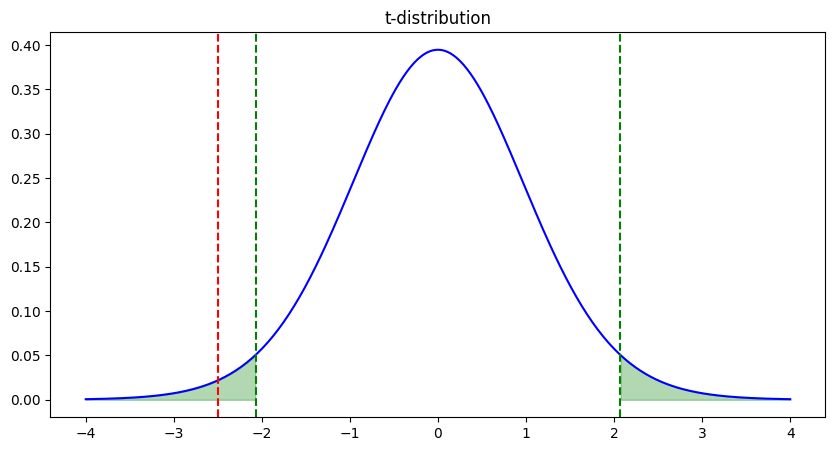

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

n = 25
df = n - 1
alpha = 0.05
t_stat = -2.5

# x축 범위
x = np.linspace(-4, 4, 400)
y = t.pdf(x, df)

# 임계값 계산 (양측 검정)
t_crit = t.ppf(1 - alpha/2, df)

plt.figure(figsize=(10, 5))
plt.plot(x, y, color='blue')

# 기각역
plt.fill_between(x, y, where=(x <= -t_crit), color='green', alpha=0.3)
plt.fill_between(x, y, where=(x >= t_crit), color='green', alpha=0.3)

# 임계값
plt.axvline(-t_crit, color='green', linestyle='--')
plt.axvline(t_crit, color='green', linestyle='--')

# t통계량
plt.axvline(t_stat, color='red', linestyle='--')

# 기타 설정
plt.title('t-distribution')
plt.show()


### 3. 단일 t 표본 검정

- 어느 학교에서 새로운 교육 프로그램을 도입한 후 학생들의 수학 성적이 향상되었는지 확인하려고 합니다. 프로그램 도입 후 무작위로 선택한 16명의 학생들의 수학 성적 평균은 78점이고, 모집단의 평균은 75점입니다. 모집단의 표준편차는 알 수 없다고 합니다.
- 유의수준 0.05에서 이 교육 프로그램이 성적 향상에 효과가 있는지 단일 표본 t-검정을 실시하세요.

<!-- TIP 박스 -->
<div style="background-color:#e6ffed; padding:10px; border-radius:5px; border-left: 5px solid #4CAF50;">
💡 <b>TIP</b><br>
수업시간에 양측검정을 기준으로 배웠습니다. 다시말하면 데이터의 평균이 특정 값과 같은지 아닌지(방향은 관심없음)입니다. 문제는 향상에 효과가 있는지에 대한 물음입니다. 함수를 무엇을 어떻게 넣어야할지 고민해보세요!(힌트 scipy docs 참고).
</div>


- 모평균 : `mu` = 75
- 모표준편차 : 모름 -> t-검정 사용
- 표본평균 : `barx` = 78
- 표본 크기 : `n` = 16

- 가설 설정 (단일 t 표본 검정)

|구분|내용|가설|
|---|---|---|
|H0 귀무가설 |교육 프로그램은 성적 향상에 효과가 없다 |mu = 75|
|H1 대립가설 |교육 프로그램은 성적 향상에 효과가 있다|mu > 75|

- 검정 목적: 성적 향상에 효과가 있다 -> 단측 검정
- [scipy docs]https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)

In [26]:
sample_scores = [79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78]
mu = 75
alpha = 0.05

# 단측 검정
t_stat, p_value_two_tailed = stats.ttest_1samp(sample_scores, mu, alternative = 'greater' )

if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다.")

t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


### 4. 독립 표본 t 검정

- 한 연구소에서 두 가지 새로운 다이어트 프로그램의 효과를 비교하려고 합니다. 연구소는 두 그룹의 참가자들을 대상으로 12주간 다이어트 프로그램을 진행한 후 체중 감소량을 측정했습니다.
- 유의수준 5% 에서 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있는지 독립 표본 t-검정을 실시하세요.

<!-- TIP 박스 -->
<div style="background-color:#e6ffed; padding:10px; border-radius:5px; border-left: 5px solid #4CAF50;">
💡 <b>TIP</b><br>
관찰연구에서는  두개의 그룹을 t검정을 할때 등분산성을 검정하게 됩니다.  `scipy.stats.levene` 문서를 읽고 등분산 검정 후 적절한 검정방법을 적용해보세요. 등분산 검정에도 역시 귀무가설과 대립가설이 존재합니다.
</div>


- 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있는지 검정
---
- 가설 검정 (등분산성 검정 (Levene test))
|구분|내용|가설|
|---|---|---|
|H0 귀무가설 |두 집단의 분산은 같다 (등분산)|var_a = var_b|
|H1 대립가설 |두 집단의 분산은 다르다 (이분산)|var_a != var_b|

검정 목적: t-test에서 등분산을 가정해도 되는지 확인하기 위함

결론:
- `p >= alpha` -> 귀무가설 채택(등분산 가정 가능) → `equal_var = True`
- `p < alpha` -> 귀무가설 기각(이분산) → `equal_var = False` 
---
- 가설 검정 (독립 표본 t-검정)

|구분|내용|가설|
|---|---|---|
|H0 귀무가설 |두 그룹의 평균 체중 감소량은 같다.|mu_a = mu_b|
|H1 대립가설 |두 그룹의 평균 체중 감소량은 다르다|mu_a != mu_b|

- 검정 목적: 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있다. -> 양측 검정

In [23]:
group_A = [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2]
group_B = [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3]
alpha = 0.05

# 등분산 검정
levene_stat, levene_p = stats.levene(group_A, group_B)
equal_var = True if levene_p >= alpha else False

t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=equal_var)

if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다.")


t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.


### 5. 대응표본 t검정
<!-- TIP 박스 -->
<div style="background-color:#e6ffed; padding:10px; border-radius:5px; border-left: 5px solid #4CAF50;">
💡 <b>TIP</b><br>
대응표본 t-검정은 두 집단간 평균 차이를 비교할 때 사용되는 점은 독립 t검정 동일하나, 같은 집단에서 두 번 수집할 때 사용되는 검정입니다.( ex 고혈압 투여 전후 환자 단일 그룹의 혈압의 차) scipy.stats docs에서 적절한 함수를 찾아보고 적용해보세요. 
</div>

- 운동 프로그램 전후의 체중 변화를 분석하기 위해 10명의 참가자의 체중을 측정했습니다. 유의수준 5%에서 운동 프로그램이 체중 감소에 효과가 있는지 **대응 표본 t-검정**을 실시하세요.
- 또한, 대응표본 t검정에서 등분산 검정이 필요한지 고민해봅시다.

- 가설 설정 (대응표본 t검정)

|구분|내용|가설|
|---|---|---|
|H0 귀무가설 |교육 프로그램은 성적 향상에 효과가 없다 |mu = 0|
|H1 대립가설 |교육 프로그램은 성적 향상에 효과가 있다|mu != 0|

- 검정 목적: 운동 프로그램이 체중 감소에 효과가 있는지 검정 (방향성 명시 X) -> **양측검정**
- [scipy docs]https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)

- 등분산 검정 필요 여부?
    - 대응표본 t-검정은 **쌍(pair)** 의 차이를 기반으로 함
    - 분산 비교가 아닌, **차이의 평균**을 검정을 함.
    - *필요 없음*

In [29]:

before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])
alpha = 0.05

t_stat, p_value = stats.ttest_rel(before, after)

if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 운동 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 운동 프로그램은 효과가 없습니다.")


t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 운동 프로그램은 효과가 있습니다.


### 6. 표본 추출

- Quest 05-01의  Online Retail II 데이터에서 표본을 추출하여 모집단의 평균을 추정해보세요.
- 영국(United Kingdom)에서 주문된 데이터 에서 30개, 100개, 300개의 샘플을 무작위 추출하여 평균 구매 금액(Total Price)를 계산해보세요. 표본의 크기가 커질 수록 모집단의 평균과 가까워지는지 확인해보세요.

In [ ]:
!pip install kagglehub

In [32]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)
retail = pd.read_csv(path + '/' + os.listdir(path)[0])
retail.head(3)

100%|█████████████████████████████████| 14.5M/14.5M [00:01<00:00, 9.27MB/s]

Extracting files...


Path to dataset files: C:\Users\daydr\.cache\kagglehub\datasets\mashlyn\online-retail-ii-uci\versions\3


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [36]:
retail["TotalPrice"] = retail["Quantity"] * retail["Price"]

uk_data = retail[retail["Country"] == "United Kingdom"]
uk_data = uk_data[uk_data["TotalPrice"] > 0] # 총 구매 금액 0 초과만 추출

n_size = [30, 100, 300]

for i in n_size:
    sample = uk_data.sample(n=i)
    mean_price = sample["TotalPrice"].mean()
    print(f"Sample size: {size}, Mean TotalPrice: {mean_price:.2f}")

Sample size: 300, Mean TotalPrice: 32.21
Sample size: 300, Mean TotalPrice: 29.97
Sample size: 300, Mean TotalPrice: 15.96


### 7. 신뢰구간

- 영국 데이터에서 TotalPrice를 사용하여 95% 신뢰 구간을 계산하세요. 또한 표본의 크기가 30,100, 300으로 변하면서 신뢰구간이 변하는 형태를 확인해 보세요.
- Hint) `stats` 모듈에서 신뢰구간을 바로 구하는 함수를 확인해보세요.

In [59]:
# 신뢰 구간 계산 함수
def confidence_interval(uk_data, confidence=0.95):
    mean = uk_data["TotalPrice"].mean()
    std_err = uk_data["TotalPrice"].sem()
    interval = stats.t.interval(confidence, len(uk_data)-1, loc=mean, scale=std_err)
    return mean, interval

# 샘플 크기에 따른 신뢰 구간 비교
sample_sizes = [30, 100, 300]
for size in sample_sizes:
    sample = uk_data.sample(size, random_state=42)
    mean, interval = confidence_interval(sample)
    print(f"Sample size: {size}, Mean: {mean:.2f}, 95% CI: {interval}")
 

Sample size: 30, Mean: 16.98, 95% CI: (np.float64(8.894205942450796), np.float64(25.063127390882535))
Sample size: 100, Mean: 17.66, 95% CI: (np.float64(12.016163967366309), np.float64(23.298036032633696))
Sample size: 300, Mean: 14.39, 95% CI: (np.float64(10.712763153344618), np.float64(18.06864351332205))


- 샘플 크기 (n)가 커질 수록
    - 표준 오차가 작아짐
    - 신뢰구간이 점점 좁아짐 -> 표본 수가 많을 수록 평균 추정이 더 정확해짐

### 8. 가설검정 t-test

- 영국과 독일의 고객의 평균 구매금액(Total Price)가 동일한지 검정해보세요. 귀무가설과 대립가설을 세우고 통계검정을 통해 결과를 해석하세요
- 영국과 독일의 분포는 등분산성은 따른다고 가정

- 가설 설정 (독립 표본 t검정)

|구분|내용|가설|
|---|---|---|
|H0 귀무가설 |영국과 독일 고객의 평균 구매금액은 같다. |mu1 = mu2|
|H1 대립가설 |영국과 독일 고객의 평균 구매금액은 다르다.|mu1 != mu2|

검정 목적: 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있다. -> 양측 검정


In [61]:
uk_total = retail[retail["Country"] == "United Kingdom"]["TotalPrice"]
germany_total = retail[retail["Country"] == "Germany"]["TotalPrice"]

uk_total = uk_total[uk_total > 0]
germany_total = germany_total[germany_total > 0]

t_stat, p_value = stats.ttest_ind(uk_total, germany_total, equal_var=True) # 등분산성 조건 

# 결과 출력
if p_value < 0.05:
    print(f"t = {t_stat:.4f}, p = {p_value:.4f}")
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.")
else:
    print(f"t = {t_stat:.4f}, p = {p_value:.4f}")
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.")


t = -4.4254, p = 0.0000
영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.


### 9-10. A/B 테스트

문제 9~ 10) A/B test스타트업A에서 새로운 여행 패키지 상품 판매를 진행하고자 합니다. 패키지 판매 기획자는 새로운 패키지의 상품 판매 효율을 높이고 싶어하며, 이를 위해 기존에 상품이 판매되던 웹 페이지 (페이지 A) 가 아닌 새로운 웹 페이지 (페이지 B)를 통해 판매하고자 합니다. 패키지 판매 기획자는 신규 웹페이지 (페이지 B) 가 기존 (페이지 A) 대비 효과가 좋은 지 확인하기 위해 A/B 테스트를 진행하였습니다.

- 페이지 A: 기존에 운영하던 패키지 판매 웹 페이지
- 페이지 B: 새롭게 생성한 패키지 판매 웹 페이지

두 페이지는 스타트업A 패키지 판매 사이트에 접속하는 유저에게 랜덤으로 노출되었고, 테스트 결과는 다음과 같습니다.

||노출 수|구매 수|
|---|---|---|
|페이지 A|1000|80|
|페이지 B|200|22|

#### 9.

- 결과를 바탕으로 패키지 기획자는 페이지 B의 효과에 대해 어떤 결정을 해야 할지 서술해 주세요.
- Hint) https://abtestguide.com/calc/  를 사용하여 해석해보세요

- 새로 만든 페이지 B가 페이지 A보다 구매 전환율이 더 높은가?

- 가설 설정

|구분|내용|가설|
|---|---|---|
|H0 귀무가설 |페이지 A와 B의 구매 전환율은 같다. 즉, 새로운 페이지는 효과가 없다.|p1 = p2|
|H1 대립가설 |페이지 B의 구매 전환율이 페이지 A보다 높다. 즉, 새로운 페이지는 더 효과적이다.|p1 != p2|

- 검정 목적: 전환율 향상에 효과가 있다 -> 단측 검정

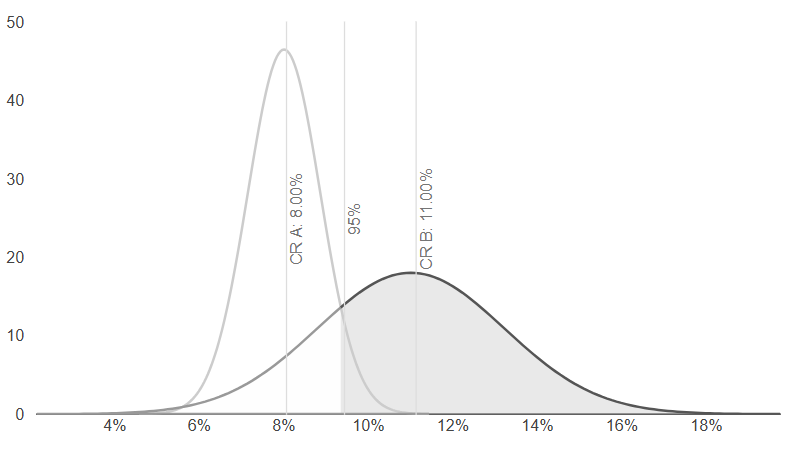

- A 전환율 (p_a) : 8.00%
- B 전환율 (p_b) : 11.00%
- 상대적 상승률 (p_b - p_a)/(p_a) : 37.5%
    - B는 A보다 전환율이 37.5% 높음
 
---
- `z-값` (표준 정규분포 상에서 관측된 값이 얼마나 떨어져 있는지 표준편차 단위로 나타낸 값) : 1.2641 
- `p-값` : 0.1031
    - 관측된 z-값 (1.2641)보다 큰 값이 나올 확률의 면적 (단측 검정이니까!)이 0.1031
    -  p-값 = 0.1031 > 0.05 -> 95% 유의수준에서 유의하지 않음. 
- `검정력` : 76.37% (보통 80% 이상이어야지 신뢰)

<결론>

현재 A/B 테스트 결과에 따르면, 페이지 B의 전환율은 A보다 37.5% 높아 긍정적인 흐름이 보여진다. 
그러나 통계적으로 분석해 보면 z값은 1.2641, 이에 따른 p값은 0.1031로, 95% 유의수준에서 통계적으로 유의미하다고 볼 수는 없다.
또한 검정력(power)은 76.37%로 보통 신뢰 기준인 80%에 미치지 못해, 현재의 표본 수로는 효과가 있다고 단정 짓기에 다소 부족한 상황이다.

비즈니스 관점에서 37.5%의 전환율 상승이 충분히 의미 있다고 판단된다면,
추가적인 리스크나 비용이 크지 않은 한 페이지 B를 채택하거나, 세부적인 것들을 조정해 적용해볼 수 있다.

하지만 현재로서는 페이지 B가 유의미한 개선을 보인다고 확신할 수 없으므로 더 많은 데이터를 수집해서 다시 검증하거나, 비용, 기대 효과등을 고려한 전략을 잡아서 진행하는 것이 현실적인 선택이 될 것 같다. 

#### 10. 

- A/B 테스트의 결과가 통계적으로 유의하나 효과의 차이 자체는 매우 작은 경우, 어떤 의사결정을 할 수 있을지 사례를 통해 설명해 주세요.
- Hint) A/B 관련 자료를 찾아보세요(추천 문헌 [요즘IT](https://yozm.wishket.com/))
- [참고] https://yozm.wishket.com/magazine/detail/1325/

구글에서도 1~2% 만큼의 UV 전환율 차이는 꽤 크게 받아들여진다고 하였고, 실제 UDACITY 수업의 예시도 유의미한 전환율을 2%로 놓고 측정한다는 사례가 있다. 

하지만 개인적인 생각으로는, 비즈니스적인 관점에서 판단해야할 문제라고 생각한다. 효과의 차이가 작아도, 이 효과가 미치는 영향은 기업의 규모에 따라 달라진다고 할 수 있다. 유튜브, 애플 등 대형 플랫폼에서는 0.5%의 변화도 수익에 큰 영향을 줄 수 있지만, 소규모 서비스에서는 무시 가능한 수준일 수도 있다.

비용 문제 역시 중요한 고려 요소이다. 이는 대부분의 A/B 테스트 사례에 적용될 수 있는 이야기이며,
단순히 통계적으로 유의하다고 해서 무작정 새로운 버전을 채택할 수 없는 이유이기도 하다. 예를 들어, 어떤 버전을 채택했을 때 발생하는 개발, 유지, 운영 등의 비용이 전환율 향상으로 얻는 효과보다 크다면,
그 변화는 실질적인 의미가 없으며, 상대적으로 작은 효과로는 변경할 타당성이 부족하다고 판단할 수 있다.반대로, 변경에 드는 비용이 거의 없거나 매우 작고, 채택함으로 인해 얻는 수익이 이를 뛰어넘는다면 정당화될 수 있지 않을까라는 생각을 하였다. 

결론적으로, A/B 테스트 결과는 단순한 통계값으로 결정할 수 없으며, 비즈니스적 효과, 도입 비용, 서비스 규모를 종합적으로 고려해 결정을 해야한다고 생각한다.

---

## 2. 정리 (헷갈리는 개념!)

#### 세 가지 t-검정 비교
|구분|단일 표본 t-검정 (ttest_1samp)|독립 표본 t-검정 (ttest_ind)|대응 표본 t-검정 (ttest_rel)|
|---|---|---|---|
|비교 대상|한 집단과 특정 기준값 비교|서로 독립된 두 집단 비교|한 집단의 전후 비교 또는 쌍으로 된 데이터|
|예시|한 반의 수학 점수가 75점과 다른지|A반 vs B반의 평균 차이|다이어트 전후 체중 변화|
|귀무가설|mu = mu0|mu1 = mu2|mu_d = 0 (차이 없음)|
|가정|정규분포|정규분포, 등분산|정규분포, 쌍체 구조 (paired data)|
|사용 함수|stats.ttest_1samp()|stats.ttest_ind()|stats.ttest_rel()|


---

## 3. KPT

|kpt|회고|
|---|---|
|Keep|1. 각 문제마다 가설, 목표, 검증 흐름을 기록하여 검증할 때 쉽게 할 수 있었다. <br> 2. 헷갈리는 개념을 따로 정리하여 개념 정립을 하였다. <br> 3. 모르는 함수가 있을 때는 GPT나 구글링을 했었는데, 이번에는 더 자세하게 보기 위해 공식 홈페이지를 참조했다. |
|Practice|수업을 들었는데도 불구하고 적용시키기가 참 어려운 것 같다.| 
|Try|헷갈리는 개념을 제대로 잡아봐야겠다.|